# K-Nearest Neighbor Lab
Read over the sklearn info on [nearest neighbor learners](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)




In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import requests
import io
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

## 1 K-Nearest Neighbor (KNN) algorithm

### 1.1 (15%) Basic KNN Classification

Learn the [Glass data set](https://archive.ics.uci.edu/dataset/42/glass+identification) using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) with default parameters.
- Randomly split your data into train/test.  Anytime we don't tell you specifics (such as what percentage is train vs test) choose your own reasonable values
- Give typical train and test set accuracies after running with different random splits
- Print the output probabilities for a test set (predict_proba)
- Try it with different p values (Minkowskian exponent) and discuss any differences

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
glass_identification = fetch_ucirepo(id=42)

X = glass_identification.data.features
y = glass_identification.data.targets

p_values = [1,2] # 1 for manhattan_distance, 2 for euclidean_distance
num_of_runs = 10

for p in p_values:
  results = []
  for run in range(num_of_runs):
    knn = KNeighborsClassifier(p=p)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    knn.fit(X_train, y_train)

    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)

    y_proba = knn.predict_proba(X_test)
    print(f"\nProbability predictions for p={p} (first 10 samples):")
    print(np.round(y_proba[:10], 4))

    results.append([train_acc, test_acc])

  all_train_acc = []
  for result in results:
    all_train_acc.append(result[0])

  all_test_acc = []
  for result in results:
    all_test_acc.append(result[1])

  avg_train_acc = sum(all_train_acc) / len(all_train_acc)
  avg_test_acc = sum(all_test_acc) / len(all_test_acc)



  print(f"Average training accuracy for p={p}: {avg_train_acc}")
  print(f"Average test accuracy for p={p}: {avg_test_acc}\n")

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Probability predictions for p=1 (first 10 samples):
[[0.  0.2 0.  0.6 0.2 0. ]
 [0.  0.  0.  0.  0.2 0.8]
 [0.2 0.6 0.2 0.  0.  0. ]
 [0.  0.2 0.  0.6 0.2 0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.8 0.2 0.  0.  0. ]
 [0.4 0.6 0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.2 0.6 0.  0.  0.  0.2]]

Probability predictions for p=1 (first 10 samples):
[[0.8 0.  0.2 0.  0.  0. ]
 [0.  0.  0.  0.8 0.2 0. ]
 [0.6 0.4 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.8 0.  0.2 0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.8 0.2 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.6 0.4 0.  0.  0.  0. ]]


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Probability predictions for p=1 (first 10 samples):
[[0.  0.  0.  0.  0.  1. ]
 [0.6 0.4 0.  0.  0.  0. ]
 [0.8 0.2 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.6 0.2 0.2 0.  0.  0. ]
 [0.8 0.  0.2 0.  0.  0. ]
 [0.4 0.2 0.4 0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.6 0.  0.4 0.  0. ]
 [0.6 0.4 0.  0.  0.  0. ]]

Probability predictions for p=1 (first 10 samples):
[[0.2 0.  0.6 0.  0.  0.2]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.4 0.6 0.  0.  0.  0. ]
 [0.8 0.  0.2 0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.6 0.4 0.  0.  0.  0. ]
 [0.2 0.8 0.  0.  0.  0. ]
 [0.  0.8 0.  0.2 0.  0. ]
 [0.  0.  0.  0.  0.  1. ]]


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Probability predictions for p=1 (first 10 samples):
[[1.  0.  0.  0.  0.  0. ]
 [0.4 0.6 0.  0.  0.  0. ]
 [0.8 0.2 0.  0.  0.  0. ]
 [0.8 0.  0.2 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.4 0.  0.4 0.2 0. ]
 [0.8 0.2 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.2 0.  0.8 0.  0. ]
 [0.4 0.  0.4 0.  0.  0.2]]

Probability predictions for p=1 (first 10 samples):
[[1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.2 0.  0.6 0.2 0. ]
 [0.  0.6 0.  0.4 0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.6 0.  0.4 0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  1. ]]

Probability predictions for p=1 (first 10 samples):
[[1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  1.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.4 0.  0.6 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.4 0.6 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]]


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Probability predictions for p=1 (first 10 samples):
[[0.  1.  0.  0.  0.  0. ]
 [0.4 0.2 0.4 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.2 0.6 0.2 0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.2 0.8 0.  0.  0.  0. ]
 [0.  0.  0.  0.4 0.  0.6]
 [0.4 0.2 0.4 0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.8 0.  0.2 0.  0.  0. ]]

Probability predictions for p=1 (first 10 samples):
[[0.6 0.  0.4 0.  0.  0. ]
 [0.8 0.2 0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0. ]
 [0.8 0.  0.2 0.  0.  0. ]
 [0.8 0.2 0.  0.  0.  0. ]
 [0.  0.4 0.  0.6 0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.6 0.4 0.  0.  0.  0. ]
 [0.  0.4 0.  0.6 0.  0. ]
 [1.  0.  0.  0.  0.  0. ]]


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Probability predictions for p=1 (first 10 samples):
[[0.2 0.2 0.  0.  0.6 0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.6 0.2 0.2 0.  0.  0. ]
 [0.6 0.4 0.  0.  0.  0. ]
 [0.8 0.2 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.6 0.  0.4 0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.8 0.  0.2 0.  0.  0. ]]
Average training accuracy for p=1: 0.7801169590643277
Average test accuracy for p=1: 0.7069767441860465


Probability predictions for p=2 (first 10 samples):
[[0.8 0.2 0.  0.  0.  0. ]
 [0.8 0.2 0.  0.  0.  0. ]
 [0.6 0.2 0.2 0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.4 0.2 0.4 0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.6 0.  0.4 0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.6 0.4 0.  0.  0.  0. ]]

Probability predictions for p=2 (first 10 samples):
[[0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.4 0.6 0.  0.  0.  0. ]
 [0.4 0.6 0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.4 0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.4

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Probability predictions for p=2 (first 10 samples):
[[0.4 0.2 0.4 0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.6 0.4 0.  0.  0.  0. ]
 [0.6 0.4 0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.4 0.2 0.4 0.  0.  0. ]
 [0.6 0.4 0.  0.  0.  0. ]
 [0.  0.8 0.  0.2 0.  0. ]
 [0.8 0.  0.2 0.  0.  0. ]]

Probability predictions for p=2 (first 10 samples):
[[0.6 0.  0.4 0.  0.  0. ]
 [0.4 0.  0.4 0.  0.  0.2]
 [1.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.4 0.  0.  0. ]
 [0.6 0.2 0.2 0.  0.  0. ]
 [0.4 0.  0.4 0.  0.  0.2]
 [0.  0.  0.  0.4 0.  0.6]
 [0.4 0.6 0.  0.  0.  0. ]
 [0.4 0.2 0.  0.  0.4 0. ]
 [0.  0.2 0.6 0.  0.  0.2]]


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Probability predictions for p=2 (first 10 samples):
[[0.8 0.2 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.6 0.4 0.  0.  0.  0. ]
 [0.4 0.6 0.  0.  0.  0. ]
 [0.8 0.2 0.  0.  0.  0. ]
 [0.8 0.  0.2 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]]


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Probability predictions for p=2 (first 10 samples):
[[0.  0.  0.  0.  0.  1. ]
 [0.2 0.8 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.4 0.4 0.2 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.4 0.  0.6 0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.6 0.2 0.2 0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]]

Probability predictions for p=2 (first 10 samples):
[[0.6 0.2 0.  0.  0.  0.2]
 [0.2 0.4 0.4 0.  0.  0. ]
 [0.8 0.  0.2 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.2 0.8 0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.8 0.  0.2 0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.4 0.  0.4 0.2 0. ]
 [0.8 0.2 0.  0.  0.  0. ]]


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Probability predictions for p=2 (first 10 samples):
[[0.8 0.2 0.  0.  0.  0. ]
 [0.8 0.2 0.  0.  0.  0. ]
 [0.  0.4 0.  0.  0.4 0.2]
 [0.  0.2 0.  0.8 0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.4 0.6 0.  0.  0.  0. ]
 [0.2 0.8 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.8 0.2 0.  0.  0.  0. ]
 [0.6 0.2 0.2 0.  0.  0. ]]

Probability predictions for p=2 (first 10 samples):
[[0.6 0.2 0.2 0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.4 0.4 0.  0.  0.  0.2]
 [0.  0.  0.  0.  0.2 0.8]
 [0.2 0.8 0.  0.  0.  0. ]
 [0.2 0.4 0.4 0.  0.  0. ]
 [0.4 0.6 0.  0.  0.  0. ]
 [0.2 0.8 0.  0.  0.  0. ]
 [0.4 0.2 0.4 0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]]


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Probability predictions for p=2 (first 10 samples):
[[0.  0.4 0.  0.  0.6 0. ]
 [0.8 0.  0.2 0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.6 0.  0.  0.4 0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.2 0.6 0.2 0.  0.  0. ]
 [0.  0.  0.  0.4 0.  0.6]
 [0.6 0.  0.4 0.  0.  0. ]
 [0.2 0.8 0.  0.  0.  0. ]]
Average training accuracy for p=2: 0.7573099415204678
Average test accuracy for p=2: 0.6348837209302327



#### Discussion
What were your accuracies or output probabilities and how did different hyperparameter values affect the outcome? Discuss the differences you see.

For Manhattan (`p=1`), there was a 78% training accuracy and a 70% test accuracy. For Euclidean (`p=2`), there was a 76% training accuracy and a 63% test accuracy, on average. This shows me that Manhattan is a little bit more accurate. Since there is so a pretty significant different between training and test accuracies for both manhattan and euclidean, that shows me that there could be some slight overfitting? Maybe we can play around with the other hyperparameters, which is what it looks like we will be doing in the other code blocks below...

## 2 KNN Classification with normalization and distance weighting

Use the [magic telescope](https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff) dataset

### 2.1 (5%) - Without Normalization or Distance Weighting
- Do random 80/20 train/test splits each time
- Run with k=3 and *without* distance weighting and *without* normalization
- Show train and test set accuracy

In [ ]:
# Learn magic telescope data
response = requests.get('https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff')

arff_data, meta_data = arff.loadarff(io.StringIO(response.text))
df = pd.DataFrame(arff_data)

df.columns = [col.strip(":") for col in df.columns]
df['class'] = df['class'].str.decode('utf-8')

X = df.drop(columns=['class'])
y = df['class']

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')

num_of_runs = 10
results = []

for run in range(num_of_runs):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  knn.fit(X_train, y_train)

  train_acc = knn.score(X_train, y_train)
  test_acc = knn.score(X_test, y_test)

  results.append([train_acc, test_acc])

  y_probabilities = knn.predict_proba(X_test)
  print(f"\nProbability predictions for (first 5 samples):")
  print(np.round(y_probabilities[:5], 4))


all_train_acc = []
for result in results:
  all_train_acc.append(result[0])

all_test_acc = []
for result in results:
  all_test_acc.append(result[1])

avg_train_acc = sum(all_train_acc) / len(all_train_acc)
avg_test_acc = sum(all_test_acc) / len(all_test_acc)

print(f'Average training accuracy without distance weighting and without normalization: {avg_train_acc}')
print(f'Average test accuracy without distance weighting and without normalization: {avg_test_acc}')



Probability predictions for (first 5 samples):
[[1.     0.    ]
 [1.     0.    ]
 [0.6667 0.3333]
 [0.3333 0.6667]
 [1.     0.    ]]

Probability predictions for (first 5 samples):
[[1.     0.    ]
 [1.     0.    ]
 [0.3333 0.6667]
 [0.6667 0.3333]
 [1.     0.    ]]

Probability predictions for (first 5 samples):
[[0.3333 0.6667]
 [1.     0.    ]
 [0.6667 0.3333]
 [0.6667 0.3333]
 [1.     0.    ]]

Probability predictions for (first 5 samples):
[[1.     0.    ]
 [0.6667 0.3333]
 [0.6667 0.3333]
 [1.     0.    ]
 [0.     1.    ]]

Probability predictions for (first 5 samples):
[[0.6667 0.3333]
 [0.     1.    ]
 [1.     0.    ]
 [1.     0.    ]
 [1.     0.    ]]

Probability predictions for (first 5 samples):
[[1.     0.    ]
 [0.3333 0.6667]
 [1.     0.    ]
 [1.     0.    ]
 [0.6667 0.3333]]

Probability predictions for (first 5 samples):
[[0.6667 0.3333]
 [1.     0.    ]
 [0.6667 0.3333]
 [0.6667 0.3333]
 [0.6667 0.3333]]

Probability predictions for (first 5 samples):
[[0.6667 0.333

#### Discussion
What did you observe in your results?

With `k=3`, no normalization, no distance weighting, on average, the training accuracy was 89% and the test accuracy was 80%.

### 2.2 (10%) With Normalization
- Try it with k=3 without distance weighting but *with* normalization of input features.  You may use any reasonable normalization approach (e.g. standard min-max normalization between 0-1, z-transform, etc.)

In [ ]:
# Train/Predict with normalization
url = "https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff"
response = requests.get(url)

arff_data, meta_data = arff.loadarff(io.StringIO(response.text))
df = pd.DataFrame(arff_data)

df.columns = [col.strip(":") for col in df.columns]
df['class'] = df['class'].str.decode('utf-8')

scaler = MinMaxScaler()

X = df.drop(columns=['class'])
X = scaler.fit_transform(X)
y = df['class']

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')

num_of_runs = 10
results = []

for run in range(num_of_runs):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  knn.fit(X_train, y_train)

  train_acc = knn.score(X_train, y_train)
  test_acc = knn.score(X_test, y_test)

  results.append([train_acc, test_acc])

  y_probabilities = knn.predict_proba(X_test)
  print(f"\nProbability predictions for (first 5 samples):")
  print(np.round(y_probabilities[:5], 4))


all_train_acc = []
for result in results:
  all_train_acc.append(result[0])

all_test_acc = []
for result in results:
  all_test_acc.append(result[1])

avg_train_acc = sum(all_train_acc) / len(all_train_acc)
avg_test_acc = sum(all_test_acc) / len(all_test_acc)

print(f'Average training accuracy without distance weighting but with normalization: {avg_train_acc}')
print(f'Average test accuracy without distance weighting but with normalization: {avg_test_acc}')



Probability predictions for (first 5 samples):
[[0.     1.    ]
 [0.6667 0.3333]
 [0.     1.    ]
 [1.     0.    ]
 [1.     0.    ]]

Probability predictions for (first 5 samples):
[[1.     0.    ]
 [1.     0.    ]
 [0.3333 0.6667]
 [1.     0.    ]
 [1.     0.    ]]

Probability predictions for (first 5 samples):
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]

Probability predictions for (first 5 samples):
[[1.     0.    ]
 [0.6667 0.3333]
 [0.     1.    ]
 [1.     0.    ]
 [1.     0.    ]]

Probability predictions for (first 5 samples):
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]

Probability predictions for (first 5 samples):
[[0.     1.    ]
 [0.6667 0.3333]
 [0.3333 0.6667]
 [1.     0.    ]
 [1.     0.    ]]

Probability predictions for (first 5 samples):
[[0.3333 0.6667]
 [1.     0.    ]
 [0.3333 0.6667]
 [0.6667 0.3333]
 [1.     0.    ]]

Probability predictions for (first 5 samples):
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]

Probability predictions for (first 5 samples):


#### Discussion
Discuss the results of using normalized data vs. unnormalized data

With `k=3`, no distance weighting, but having normalization (which we should usually always do), the training accruacy was better than before, having 90% training accuracy and 83% test accuracy.

### 2.3 (10%) With Distance Weighting
- Try it with k=3 and with distance weighting *and* normalization

In [ ]:
# Train/Precdict with normalization and distance weighting
response = requests.get('https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff')

arff_data, meta_data = arff.loadarff(io.StringIO(response.text))
df = pd.DataFrame(arff_data)

df.columns = [col.strip(":") for col in df.columns]
df['class'] = df['class'].str.decode('utf-8')

scaler = MinMaxScaler()

X = df.drop(columns=['class'])
X = scaler.fit_transform(X)
y = df['class']

knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

num_of_runs = 10
results = []

for run in range(num_of_runs):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  knn.fit(X_train, y_train)

  train_acc = knn.score(X_train, y_train)
  test_acc = knn.score(X_test, y_test)

  results.append([train_acc, test_acc])

  y_probabilities = knn.predict_proba(X_test)
  print(f"\nProbability predictions for (first 5 samples):")
  print(np.round(y_probabilities[:5], 4))


all_train_acc = []
for result in results:
  all_train_acc.append(result[0])

all_test_acc = []
for result in results:
  all_test_acc.append(result[1])

avg_train_acc = sum(all_train_acc) / len(all_train_acc)
avg_test_acc = sum(all_test_acc) / len(all_test_acc)

print(f'Average training accuracy with distance weighting and normalization: {avg_train_acc}')
print(f'Average test accuracy with distance weighting and normalization: {avg_test_acc}')



Probability predictions for (first 5 samples):
[[1.    0.   ]
 [1.    0.   ]
 [0.352 0.648]
 [1.    0.   ]
 [1.    0.   ]]

Probability predictions for (first 5 samples):
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]

Probability predictions for (first 5 samples):
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]

Probability predictions for (first 5 samples):
[[0.3339 0.6661]
 [0.6679 0.3321]
 [1.     0.    ]
 [1.     0.    ]
 [0.     1.    ]]

Probability predictions for (first 5 samples):
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]

Probability predictions for (first 5 samples):
[[1.     0.    ]
 [0.3474 0.6526]
 [0.6746 0.3254]
 [0.712  0.288 ]
 [0.2966 0.7034]]

Probability predictions for (first 5 samples):
[[1.     0.    ]
 [0.6865 0.3135]
 [1.     0.    ]
 [0.6636 0.3364]
 [1.     0.    ]]

Probability predictions for (first 5 samples):
[[1.    0.   ]
 [1.    0.   ]
 [0.627 0.373]
 [1.    0.   ]
 [1.    0.   ]]

Probability predictions for (first 5 samples):
[[0.7303 0.2697]
 [0

#### Discussion
Comparison and discuss the differences you see with distance weighting and normalization vs without.

With `k=3`, distance weighting, but having normalization (which we should usually always do), the training accruacy was 100% training accuracy and 83% test accuracy. This shows that we have overfit. This caused me to look at the documentation about distance tranining, it says that when we use distance weighting, "closer neighbors of a query point will have a greater influence than neighbors which are further away." This make sense why we would overfit if we have a pretty small `k` value.

### 2.4 (10%) Different k Values
- Using your normalized data with distance weighting, create one graph with classification accuracy on the test set on the y-axis and k values on the x-axis.
- Use values of k from 1 to 15.  Use the same train/test split for each.


Probability predictions for (first 5 samples):
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]

Probability predictions for (first 5 samples):
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]

Probability predictions for (first 5 samples):
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]

Probability predictions for (first 5 samples):
[[0.7717 0.2283]
 [1.     0.    ]
 [1.     0.    ]
 [1.     0.    ]
 [0.238  0.762 ]]

Probability predictions for (first 5 samples):
[[0.6338 0.3662]
 [1.     0.    ]
 [0.8222 0.1778]
 [1.     0.    ]
 [0.1924 0.8076]]

Probability predictions for (first 5 samples):
[[0.6881 0.3119]
 [1.     0.    ]
 [0.8487 0.1513]
 [1.     0.    ]
 [0.1614 0.8386]]

Probability predictions for (first 5 samples):
[[0.6035 0.3965]
 [1.     0.    ]
 [0.8677 0.1323]
 [1.     0.    ]
 [0.1394 0.8606]]

Probability predictions for (first 5 samples):
[[0.5375 0.4625]
 [1.     0.    ]
 [0.8823 0.1177]
 [1.     0.    ]
 [0.1227 0.8773]]

Probability predictions for (first 5 samples):


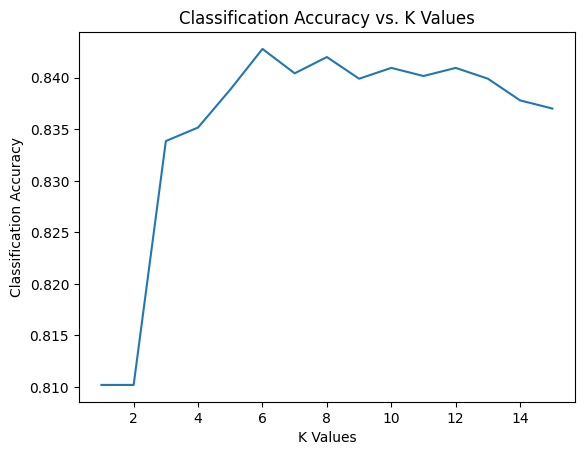

In [ ]:
# Calculate and Graph classification accuracy vs k values
response = requests.get('https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff')

arff_data, meta_data = arff.loadarff(io.StringIO(response.text))
df = pd.DataFrame(arff_data)

df.columns = [col.strip(":") for col in df.columns]
df['class'] = df['class'].str.decode('utf-8')

scaler = MinMaxScaler()

X = df.drop(columns=['class'])
X = scaler.fit_transform(X)
y = df['class']

k_values = list(range(1,16))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
results= []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k, weights='distance')

  knn.fit(X_train, y_train)

  train_acc = knn.score(X_train, y_train)
  test_acc = knn.score(X_test, y_test)

  results.append([train_acc, test_acc])

  y_probabilities = knn.predict_proba(X_test)
  print(f"\nProbability predictions for (first 5 samples):")
  print(np.round(y_probabilities[:5], 4))

all_train_acc = []
for result in results:
  all_train_acc.append(result[0])

all_test_acc = []
for result in results:
  all_test_acc.append(result[1])

avg_train_acc = sum(all_train_acc) / len(all_train_acc)
avg_test_acc = sum(all_test_acc) / len(all_test_acc)

print(f'Average training accuracy of k={k}: {avg_train_acc}')
print(f'Average test accuracy of k={k}: {avg_test_acc}')
print('\n')

plt.title("Classification Accuracy vs. K Values")
plt.xlabel("K Values")
plt.ylabel("Classification Accuracy")
plt.plot(k_values, all_test_acc)
plt.show()

#### Discussion
How do the k values affect your results?

Starting off with low values of `k` was our lowest testing accuracies. We peaked in test accuracy when `k=6` with about 85% accuracy.

## 3 KNN Regression with normalization and distance weighting

Use the [sklean KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) on the [housing price prediction](https://axon.cs.byu.edu/data/uci_regression/housing.arff) problem.  
### 3.1 (5%) Ethical Data
Note this data set has an example of an inappropriate input feature which we discussed.  State which feature is inappropriate and discuss why.

#### Discussion
Discuss the innapropriate feature. Which one and why?

The inappropriate input feature is `b` -- 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town. The reason why we don't want this feature in there is because it can, if there is some type of correlation, make our model have racist tendencies and people would think that we may be racist as well. Let's take that out in the next code cell...

### 3.2 (15%) - KNN Regression
- Do random 80/20 train/test splits each time
- Run with k=3
- Print the score (coefficient of determination) and Mean Absolute Error (MAE) for the train and test set for the cases of
  - No input normalization and no distance weighting
  - Normalization and no distance weighting
  - Normalization and distance weighting
- Normalize inputs features where needed but do not normalize the output

In [ ]:
# Learn and experiment with housing price prediction data
response = requests.get('https://axon.cs.byu.edu/data/uci_regression/housing.arff')

arff_data, meta_data = arff.loadarff(io.StringIO(response.text))
df = pd.DataFrame(arff_data)
df = df.drop("B", axis=1)

scaler = MinMaxScaler()

X = df.drop('MEDV', axis=1)
X_scaled = scaler.fit_transform(X)
y = df['MEDV']

runs = {
    1: [X, 'uniform'],
    2: [X_scaled, "uniform"],
    3: [X_scaled, "distance"]
}

for run, (X_variant, weight_type) in runs.items():
  print(f'run: {run} weight type: {weight_type}')
  X_train, X_test, y_train, y_test = train_test_split(X_variant, y, test_size=0.2)
  knnr = KNeighborsRegressor(n_neighbors=3, weights=weight_type)

  knnr.fit(X_train, y_train)

  train_acc = knnr.score(X_train, y_train)
  test_acc = knnr.score(X_test, y_test)

  train_mae = mean_absolute_error(y_train, knnr.predict(X_train))
  test_mae = mean_absolute_error(y_test, knnr.predict(X_test))

  print(f'Training accuracy: {train_acc}')
  print(f'Test accuracy: {test_acc}')
  print(f'Train MAE: {train_mae}')
  print(f'Test MAE: {test_mae}')
  print('\n')

run: 1 weight type: uniform
Training accuracy: 0.8185679369856832
Test accuracy: 0.6257560430284157
Train MAE: 2.523267326732673
Test MAE: 4.330392156862745


run: 2 weight type: uniform
Training accuracy: 0.8748949608154964
Test accuracy: 0.8020813056913211
Train MAE: 2.049009900990099
Test MAE: 3.0656862745098032


run: 3 weight type: distance
Training accuracy: 1.0
Test accuracy: 0.8031936540384034
Train MAE: 0.0
Test MAE: 2.879683395530711




#### Discussion
Discuss your results. How did the hyperparameters affect your results? Discuss each one and combinations of each.

run 1 (No distance, no normalization): Had the worst training and test accuracy and the highest MAE, with a training MAE of 2.5 and test MAE of 4.33.

run 2 (No distance, normalization): Had better training and test accuracy. MAE from training was 2 and test MAE was 3.

run 3 (distance, normalization): Had the best accuracies and lowest MAE. MAE was the best for train at 0.0 and test was 2.9, which was the best also for test.

### 3.3 (10%)  Different k Values
- Using housing with normalized data and distance weighting, create one graph with MAE on the test set on the y-axis and k values on the x-axis
- Use values of k from 1 to 15.  Use the same train/test split for each.

Average training accuracy: 1.0
Average test accuracy: 0.7490803364182369
[3.4862745098039216, 2.923561776861738, 2.875408566530049, 2.9045999997135343, 2.7746389522948047, 2.707848783983894, 2.8169818453708673, 2.8107348806733254, 2.8714809668185057, 2.867392806341853, 2.8857044184499725, 2.8844018129042928, 2.922816007703474, 2.90824420576262, 2.95196958746192]


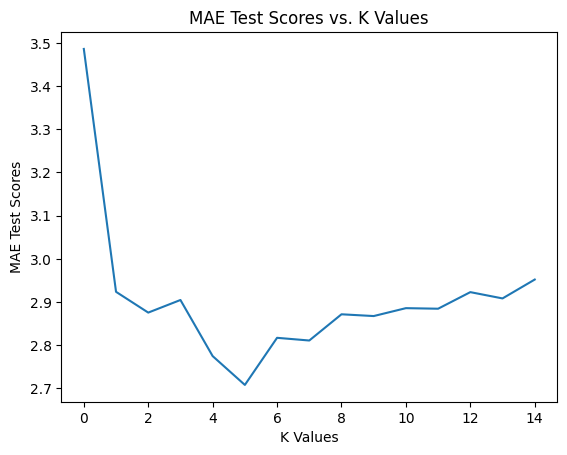

In [ ]:
# Learn and graph for different k values
response = requests.get('https://axon.cs.byu.edu/data/uci_regression/housing.arff')
arff_data, meta_data = arff.loadarff(io.StringIO(response.text))

df = pd.DataFrame(arff_data)
df = df.drop("B", axis=1)

scaler = MinMaxScaler()

X = df.drop('MEDV', axis=1)
X = scaler.fit_transform(X)
y = df['MEDV']

k_values = list(range(1,16))
results = []

for k in k_values:

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  knnr = KNeighborsRegressor(n_neighbors=k, weights='distance')

  knnr.fit(X_train, y_train)

  train_acc = knnr.score(X_train, y_train)
  test_acc = knnr.score(X_test, y_test)
  test_mae = mean_absolute_error(y_test, knnr.predict(X_test))

  results.append([train_acc, test_acc, test_mae])

avg_train_acc = sum(result[0] for result in results) / len(results)
avg_test_acc = sum(result[1] for result in results) / len(results)
avg_mae = sum(result[2] for result in results) / len(results)


print(f'Average training accuracy: {avg_train_acc}')
print(f'Average test accuracy: {avg_test_acc}')


all_MAE_scores = []
for result in results:
  all_MAE_scores.append(result[2])

print(all_MAE_scores)

plt.title("MAE Test Scores vs. K Values")
plt.xlabel("K Values")
plt.ylabel("MAE Test Scores")
plt.plot(k_values, all_MAE_scores)
plt.show()

#### Discussion
How did the k values affect your results for this dataset? How does that compare to your previous work in this lab?

With `k=5`, we achieved the lowest k MAE for our test scores. When our k values were below `k=5`, we had the highest MAE, and from `k=6` and beyond, we would gradually increase the MAE test scores. This is consistent with the other parts of the lab (Magic telescope) with having not a super low k value or high k value in which we would get good accuracy and lower MAE.

## 4. (20%) KNN with nominal and real data

- Use the [lymph dataset](https://axon.cs.byu.edu/data/uci_class/lymph.arff)
- Use a 80/20 split of the data for the training/test set
- This dataset has both continuous and nominal attributes
- Implement a distance metric which uses Euclidean distance for continuous features and 0/1 distance for nominal. Hints:
    - Write your own distance function (e.g. mydist) and use clf = KNeighborsClassifier(metric=mydist)
    - Change the nominal features in the data set to integer values since KNeighborsClassifier expects numeric features. I used Label_Encoder on the nominal features.
    - Keep a list of which features are nominal which mydist can use to decide which distance measure to use
    - There was an occasional bug in SK version 1.3.0 ("Flags object has no attribute 'c_contiguous'") that went away when I upgraded to the lastest SK version 1.3.1
- Use your own choice for k and other parameters

In [ ]:
# Train/Predict lymph with your own distance metric
response = requests.get('https://axon.cs.byu.edu/data/uci_class/lymph.arff')
arff_data, meta_data = arff.loadarff(io.StringIO(response.text))

df = pd.DataFrame(arff_data)
label_encoder = LabelEncoder()

df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).astype(str)

X = df.drop(columns="class", axis=1)
y = df['class']

categorical_indices = []
integer_indicies = []

for i, col in enumerate(X.columns):
  if (X[col].dtype == 'object'):
    categorical_indices.append(i)
    X[col] = label_encoder.fit_transform(X[col])
  else:
    integer_indicies.append(i)


label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

def myDist(x, y):
  if len(categorical_indices) == 0:
      return np.sum(np.abs(x - y)) # Manhattan
  else:
      return np.sum(x != y) # hamming


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = KNeighborsClassifier(n_neighbors=5, metric=myDist)

clf.fit(X_train, y_train)

train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)

print(f'Traning Accuracy: {train_acc}')
print(f'Test Accuracy: {test_acc}')

Traning Accuracy: 0.8559322033898306
Test Accuracy: 0.8333333333333334


#### Discussion
Explain your distance metric and discuss your results

I used `LabelEncoder` for the nominal features.

For my `myDist` function I created an if/else branched distance function where if the data was numerical (rather than categorical) then I would calculate the Manhattan distance, otherwise I would run the Hamming distance. Hamming distance the minimum distance between any two points. I was able to get 86% train accuracy and 83% test accuracy.

## 5. (Optional 15% extra credit) Code up your own KNN Learner
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below
- Use Euclidean distance to decide closest neighbors
- Implement both the classification and regression versions
- Include optional distance weighting for both algorithms
- Run your algorithm on the magic telescope and housing data sets above and discuss and compare your results

*Discussion*

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KNNClassifier(BaseEstimator,ClassifierMixin):
    def __init__(self, columntype=[], weight_type='inverse_distance'): ## add parameters here
        """
        Args:
            columntype for each column tells you if continues[real] or if nominal[categoritcal].
            weight_type: inverse_distance voting or if non distance weighting. Options = ["no_weight","inverse_distance"]
        """
        self.columntype = columntype #Note This won't be needed until part 5
        self.weight_type = weight_type

    def fit(self, data, labels):
        """ Fit the data; run the algorithm (for this lab really just saves the data :D)
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self

    def predict(self, data):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    #Returns the Mean score given input data and labels
    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        return 0